In [1]:
# Libraries
import torch
import math
from tqdm import trange
from slips.distributions.mog import CircularMixture
from slips.samplers.rdmc import rdmc_algorithm
import matplotlib.pyplot as plt

In [2]:
# Make a Pytorch device
device = torch.device('cuda')

In [3]:
# Make the target distribution
target = CircularMixture(device)

In [4]:
# Get the score of the target distribution
def target_log_prob_and_grad(y):
    y_ = torch.autograd.Variable(y, requires_grad=True)
    log_prob_y = target.log_prob(y_)
    return log_prob_y, torch.autograd.grad(log_prob_y.sum(), y_)[0].detach()

In [5]:
# Run the RDMC algorithm
T = -math.log(0.95)
batch_size = 2048
x_init = torch.randn((batch_size, 2), device=device) * math.sqrt(1. - math.exp(-2. * T))
samples = rdmc_algorithm(x_init, target.log_prob, target_log_prob_and_grad, T=T, K=1024, n_warm_start_steps=32, n_chains=8,
                   n_mcmc_steps=32, n_mc_samples=256, verbose=True).detach().cpu()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [01:12<00:00, 14.15it/s]


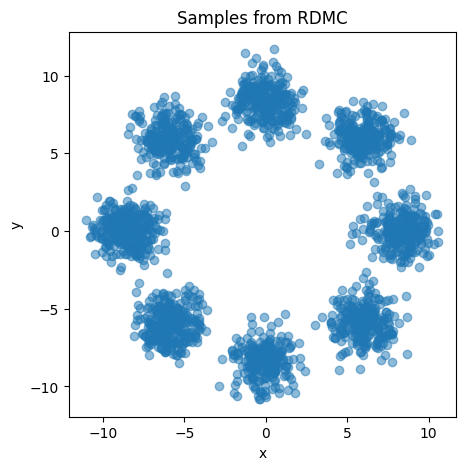

In [9]:
# Display samples
plt.figure(figsize=(5,5))
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from RDMC')
plt.show()

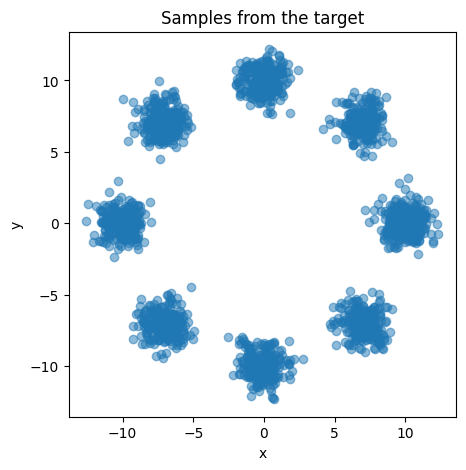

In [7]:
# Display target samples
plt.figure(figsize=(5,5))
target_samples = target.sample((samples.shape[0],)).cpu()
plt.scatter(target_samples[:,0], target_samples[:,1], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from the target')
plt.show()